In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
#problem constants
nu=1e-6
mu=1e-3
rho=1e+3
dt=0.0001
gradP=-2.4
n_iter=0
'''
node generation section
'''
#domain length

Lx1=0.02
Lx2=0.01

#number of cells on each direction
Nx1=60
Nx2=30

#mesh spacing
h=Lx1/Nx1

u1_ave=0.02

def Adv_x_n(i,j):
    return (1/h)*((0.5*(cell_S_x_un[i,j]+cell_S_x_un[i+1,j]))**2-(0.5*(cell_S_x_un[i,j]+cell_S_x_un[i-1,j]))**2+(0.5*(cell_S_x_un[i,j+1]+cell_S_x_un[i,j]))*(cell_S_y_vn[i,j+1]+cell_S_y_vn[i+1,j+1])-(0.5*(cell_S_x_un[i,j]+cell_S_x_un[i,j-1]))*(0.5*(cell_S_y_vn[i,j]+cell_S_y_vn[i+1,j])))

def Dif_x_n(i,j):
    return (1/(h**2))*(cell_S_x_un[i+1,j]+cell_S_x_un[i-1,j]+cell_S_x_un[i,j+1]+cell_S_x_un[i,j-1]-4*cell_S_x_un[i,j])

def ref_vel_prof(x2):
    return -1200*((x2-0.005)**2)+0.03



In [5]:

#cell centroid coor
#the +2 stands for ghost cells on each direction
cell_cent_x=np.zeros([Nx1+2,Nx2+2])
cell_cent_y=np.zeros([Nx1+2,Nx2+2])

cell_cent_un=np.zeros([Nx1+2,Nx2+2])
cell_cent_us=np.zeros([Nx1+2,Nx2+2])
cell_cent_unn=np.zeros([Nx1+2,Nx2+2])

#cell corner coor
cell_cor_x=np.zeros([Nx1+3,Nx2+3])
cell_cor_y=np.zeros([Nx1+3,Nx2+3])

#surf area of the cell 
cell_S_x=np.zeros([Nx1+2,Nx2+2])
cell_S_y=np.zeros([Nx1+2,Nx2+2])

cell_S_x_coor_x=np.zeros([Nx1+2,Nx2+2])
cell_S_x_coor_y=np.zeros([Nx1+2,Nx2+2])
cell_S_y_coor_x=np.zeros([Nx1+2,Nx2+2])
cell_S_y_coor_y=np.zeros([Nx1+2,Nx2+2])

#normal vector of cell surfaces
cell_S_x_nx=np.zeros([Nx1+2,Nx2+2])
cell_S_x_ny=np.zeros([Nx1+2,Nx2+2])
cell_S_y_nx=np.zeros([Nx1+2,Nx2+2])
cell_S_y_ny=np.zeros([Nx1+2,Nx2+2])
#surface velocities
cell_S_x_un=np.zeros([Nx1+2,Nx2+2])
cell_S_x_us=np.zeros([Nx1+2,Nx2+2])
cell_S_x_unn=np.zeros([Nx1+2,Nx2+2])

cell_S_x_vn=np.zeros([Nx1+2,Nx2+2])
cell_S_x_vs=np.zeros([Nx1+2,Nx2+2])
cell_S_x_vnn=np.zeros([Nx1+2,Nx2+2])
#cell_S_x_v=np.zeros([Nx1+2,Nx2+2])
cell_S_y_un=np.zeros([Nx1+2,Nx2+2])
cell_S_y_us=np.zeros([Nx1+2,Nx2+2])
cell_S_y_unn=np.zeros([Nx1+2,Nx2+2])

cell_S_y_vn=np.zeros([Nx1+2,Nx2+2])
cell_S_y_vs=np.zeros([Nx1+2,Nx2+2])
cell_S_y_vnn=np.zeros([Nx1+2,Nx2+2])
#cell_S_y_v=np.zeros([Nx1+2,Nx2+2])
#reference velocity profile
ref_S_u=np.zeros([Nx2+2])
L_sq=np.array([1.0,1.0])

#corner coor initialization
for j in range(0,Nx2+3):
    for i in range(0, Nx1+3):
        cell_cor_x[i,j]=(Lx1/Nx1)*(i-1)
        cell_cor_y[i,j]=(Lx2/Nx2)*(j-1)


In [8]:
#cell cent coor storage
for j in range(0, Nx2+2):
    for i in range(0, Nx1+2):
        cell_cent_x[i,j]='{:10.6e}'.format(0.25*(cell_cor_x[i,j]+cell_cor_x[i+1,j]+cell_cor_x[i,j+1]+cell_cor_x[i+1,j+1]))
        cell_cent_y[i,j]='{:10.6e}'.format(0.25*(cell_cor_y[i,j]+cell_cor_y[i+1,j]+cell_cor_y[i,j+1]+cell_cor_y[i+1,j+1]))
        cell_S_x_coor_x[i,j]=(cell_cor_x[i,j]+cell_cor_x[i,j+1])/2
        cell_S_x_coor_y[i,j]=(cell_cor_y[i,j]+cell_cor_y[i,j+1])/2
        cell_S_y_coor_x[i,j]=(cell_cor_x[i,j]+cell_cor_x[i+1,j])/2
        cell_S_y_coor_y[i,j]=(cell_cor_y[i,j]+cell_cor_y[i+1,j])/2

        #initial conditions
        cell_S_x_un[i,j]=0.03
        cell_S_y_un[i,j]=0.00

        cell_S_x[i,j]=abs(cell_cor_y[i,j]-cell_cor_y[i,j+1])
        cell_S_y[i,j]=abs(cell_cor_x[i,j]-cell_cor_x[i+1,j])

        cell_S_x_nx[i,j]=(cell_cor_y[i,j+1]-cell_cor_y[i,j])/cell_S_x[i,j]
        cell_S_x_ny[i,j]=(cell_cor_x[i,j+1]-cell_cor_x[i,j])/cell_S_x[i,j]
        cell_S_y_nx[i,j]=(cell_cor_y[i+1,j]-cell_cor_y[i,j])/cell_S_y[i,j]
        cell_S_y_ny[i,j]=(cell_cor_x[i+1,j]-cell_cor_x[i,j])/cell_S_y[i,j]



In [10]:
cell_cent_x

array([[-0.00016667, -0.00016667, -0.00016667, ..., -0.00016667,
        -0.00016667, -0.00016667],
       [ 0.00016667,  0.00016667,  0.00016667, ...,  0.00016667,
         0.00016667,  0.00016667],
       [ 0.0005    ,  0.0005    ,  0.0005    , ...,  0.0005    ,
         0.0005    ,  0.0005    ],
       ...,
       [ 0.0195    ,  0.0195    ,  0.0195    , ...,  0.0195    ,
         0.0195    ,  0.0195    ],
       [ 0.01983333,  0.01983333,  0.01983333, ...,  0.01983333,
         0.01983333,  0.01983333],
       [ 0.02016667,  0.02016667,  0.02016667, ...,  0.02016667,
         0.02016667,  0.02016667]])

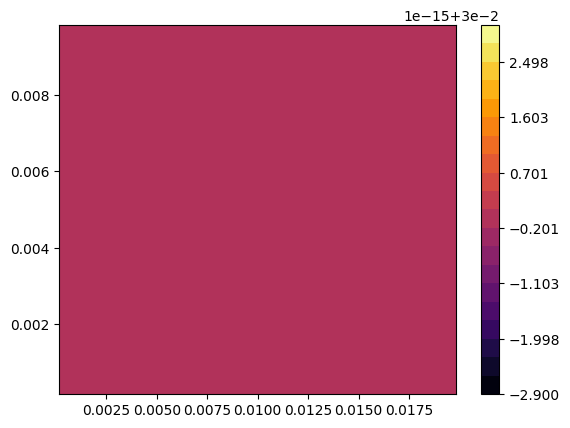

In [4]:
plt.contourf(cell_cent_x[1:Nx1+1, 1:Nx2+1], cell_cent_y[1:Nx1+1, 1:Nx2+1],
cell_S_x_un[1:Nx1+1, 1:Nx2+1], 20, cmap='inferno')
plt.colorbar()
plt.show()


iter= 0, L_sq= 1.0000e+00


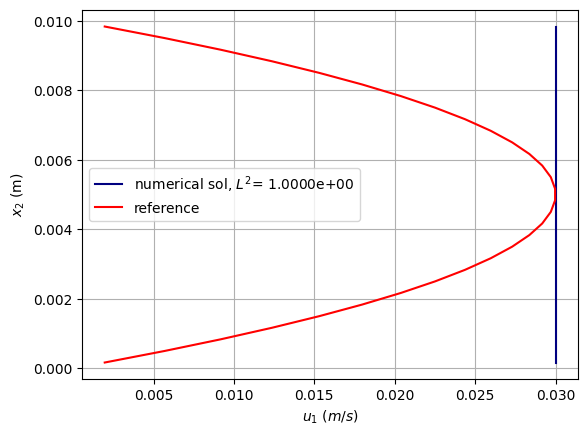

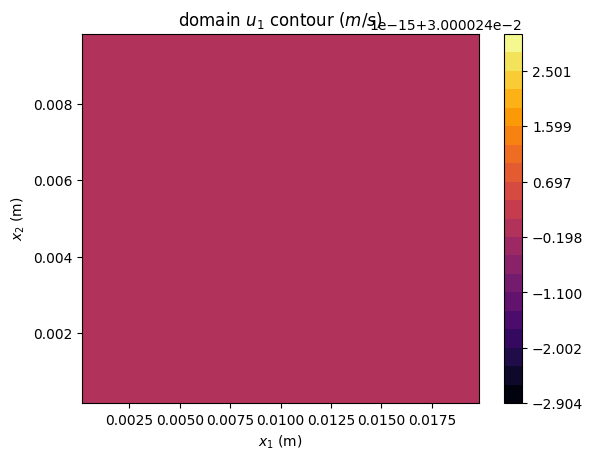

iter= 10000, L_sq= 6.6583e-03


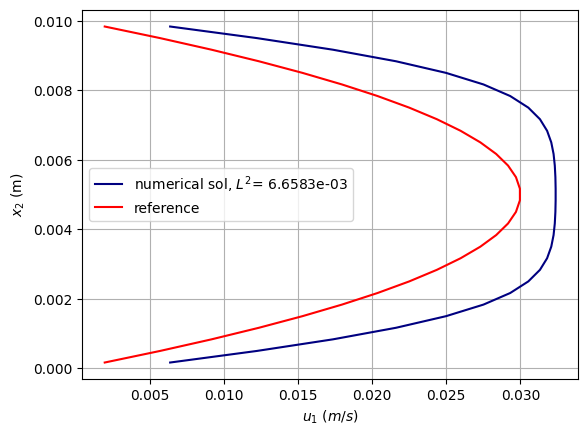

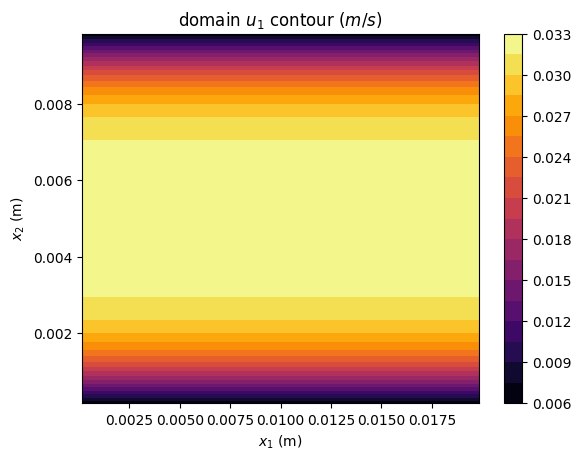

iter= 20000, L_sq= 5.3196e-03


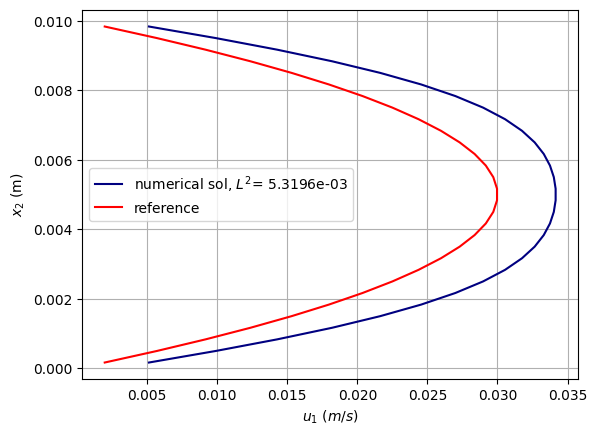

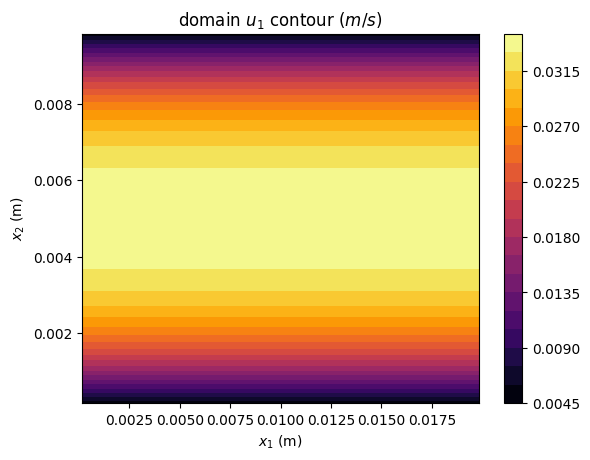

iter= 30000, L_sq= 4.7731e-03


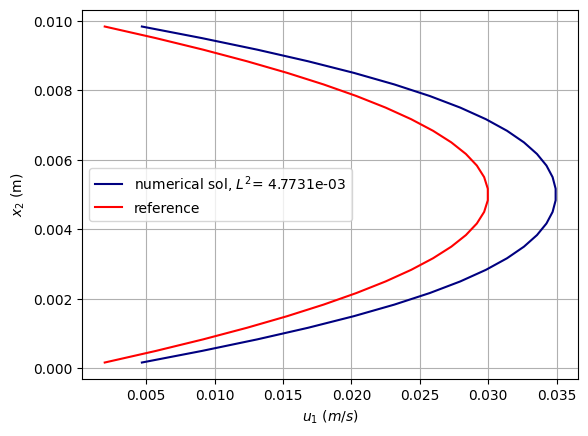

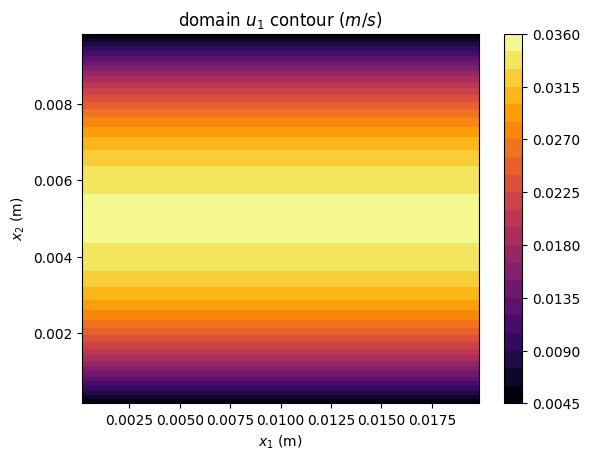

iter= 40000, L_sq= 4.4497e-03


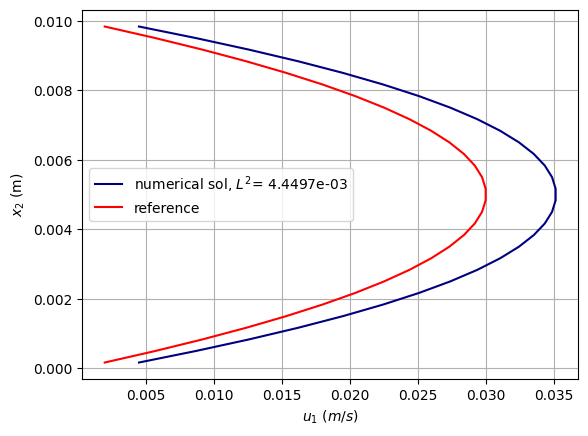

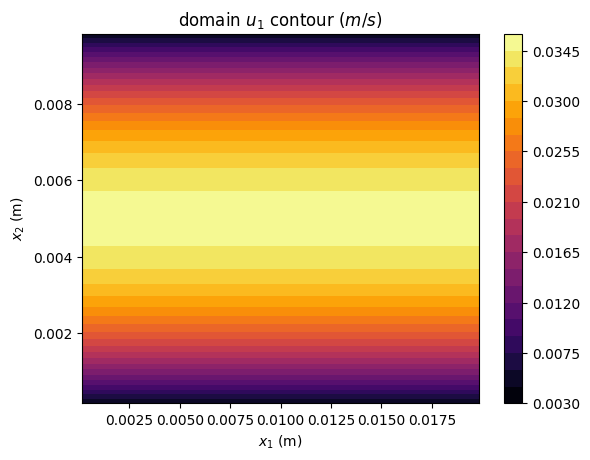

iter= 50000, L_sq= 4.2037e-03


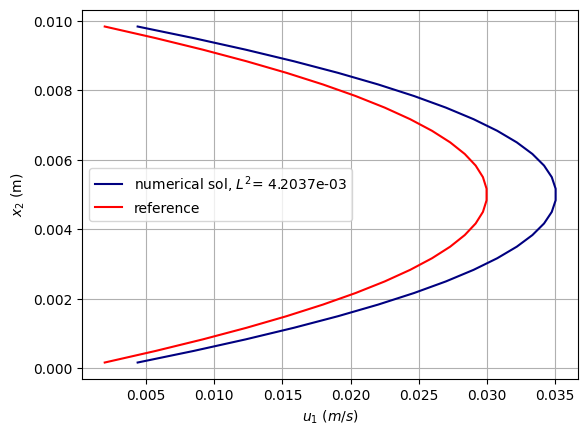

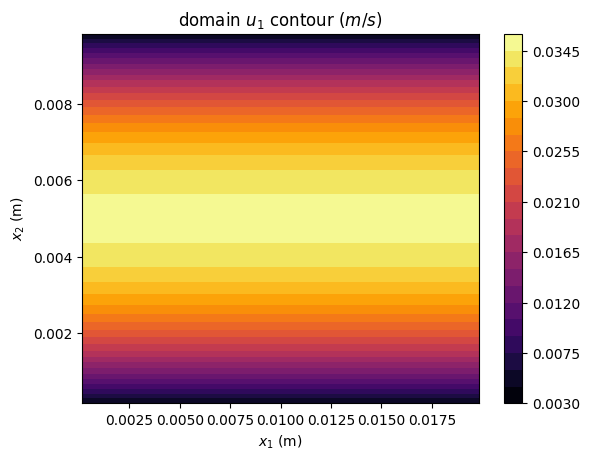

iter= 60000, L_sq= 3.9953e-03


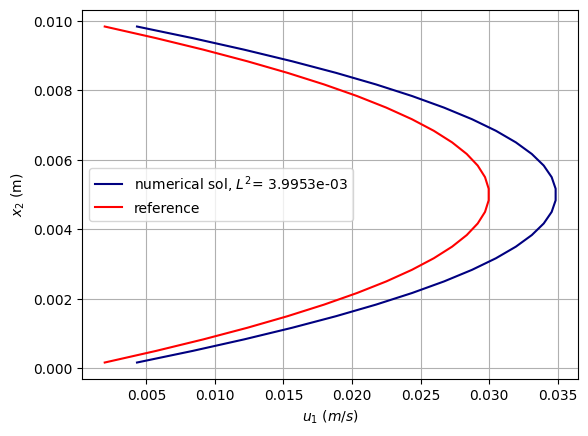

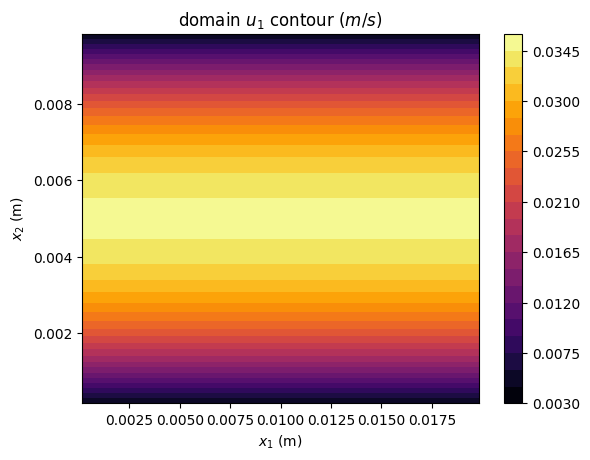

iter= 70000, L_sq= 3.8113e-03


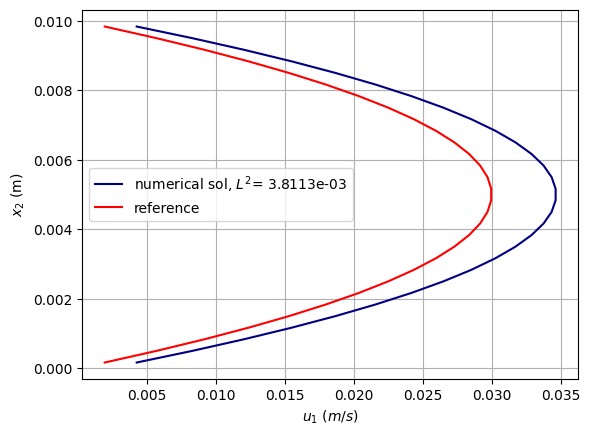

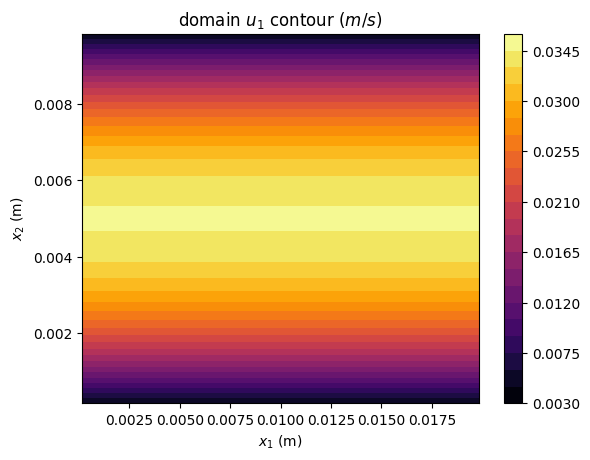

iter= 80000, L_sq= 3.6463e-03


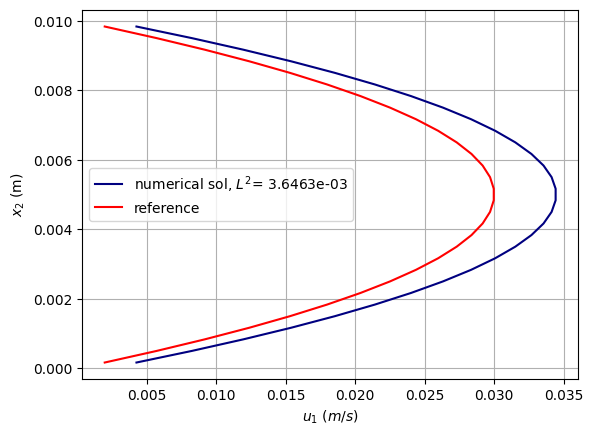

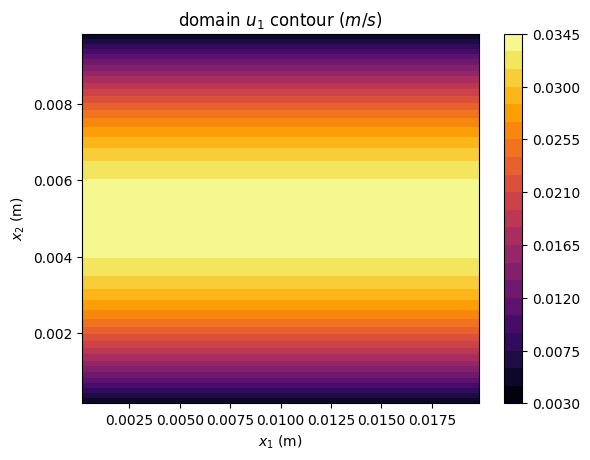

iter= 90000, L_sq= 3.4971e-03


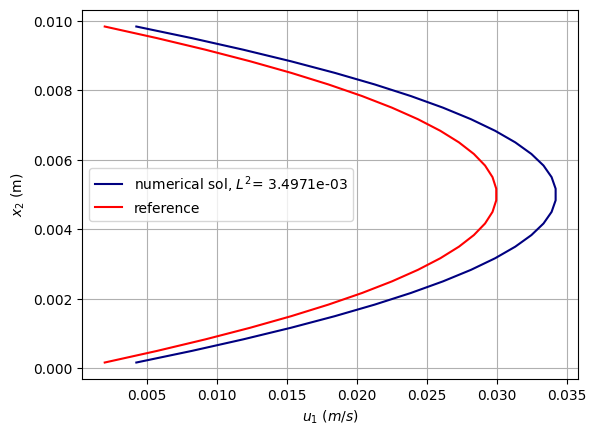

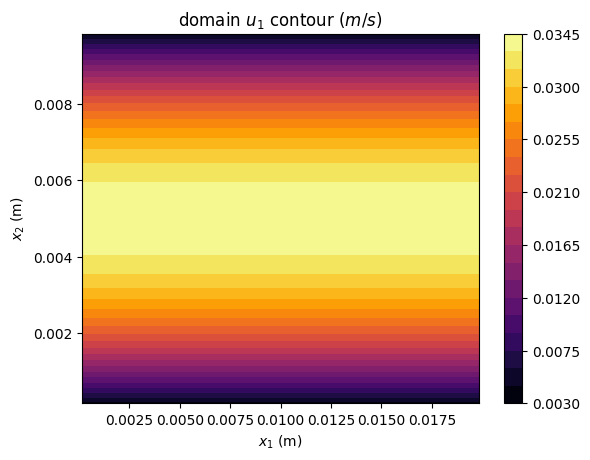

iter= 100000, L_sq= 3.3619e-03


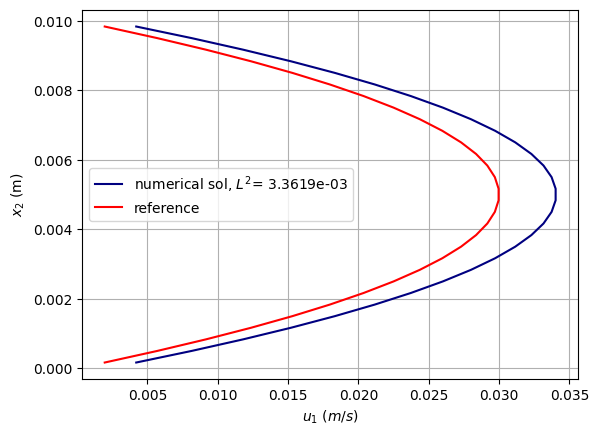

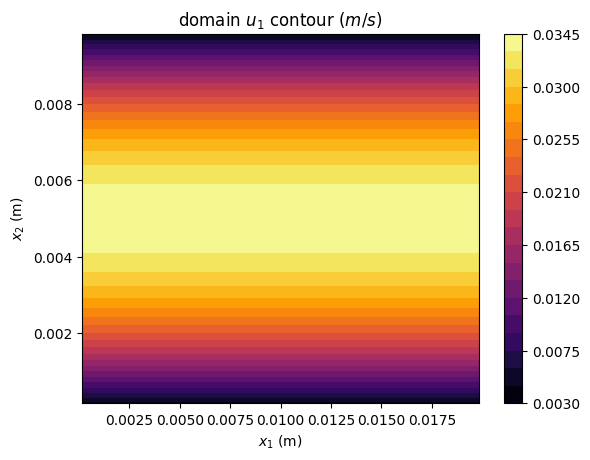

iter= 110000, L_sq= 3.2391e-03


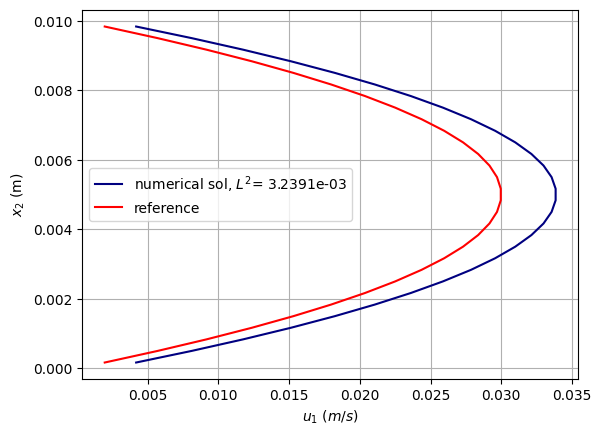

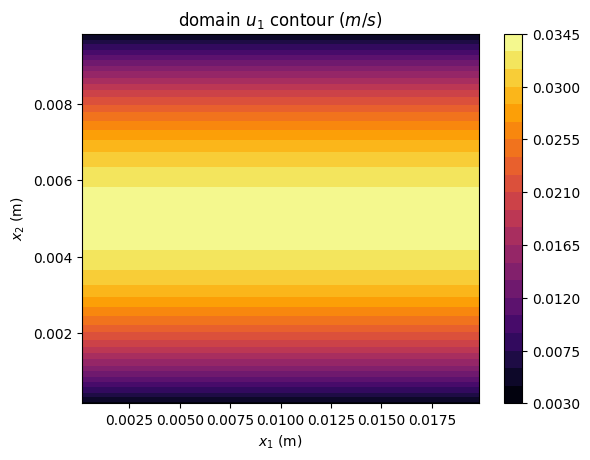

iter= 120000, L_sq= 3.1275e-03


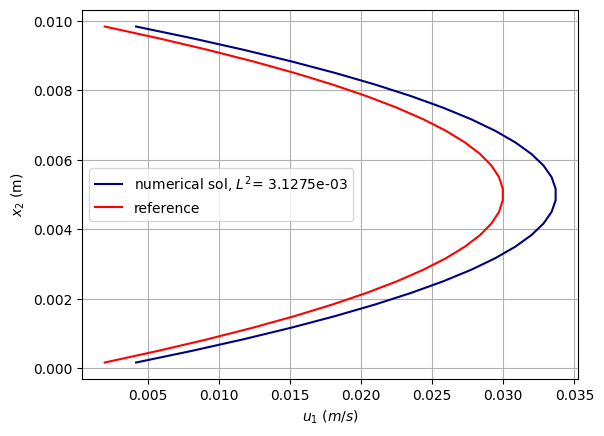

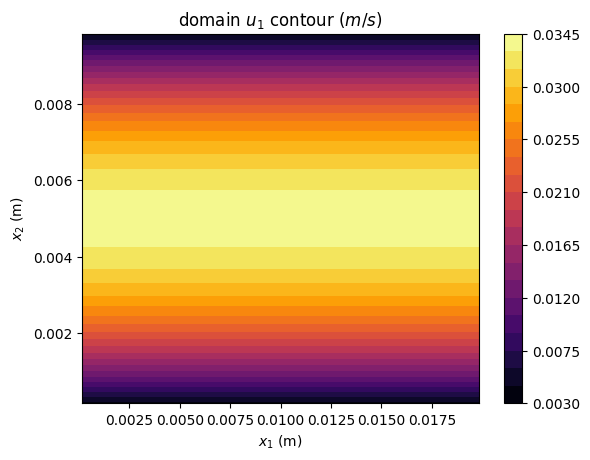

iter= 130000, L_sq= 3.0260e-03


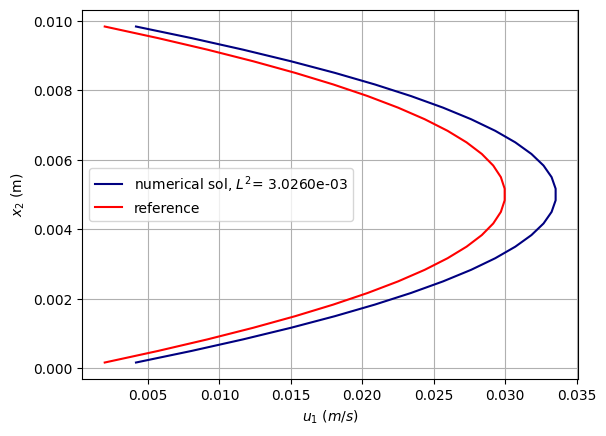

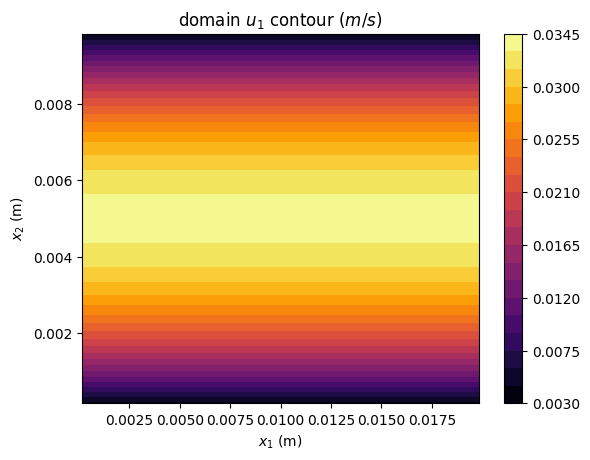

iter= 140000, L_sq= 2.9338e-03


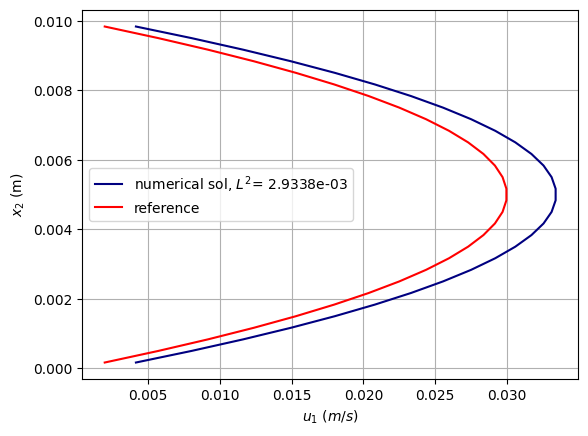

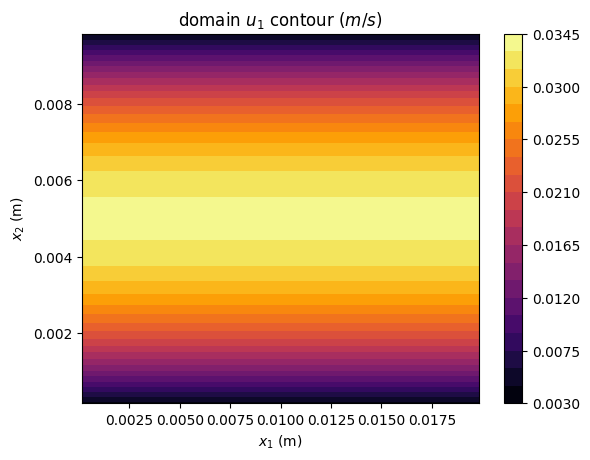

iter= 150000, L_sq= 2.8499e-03


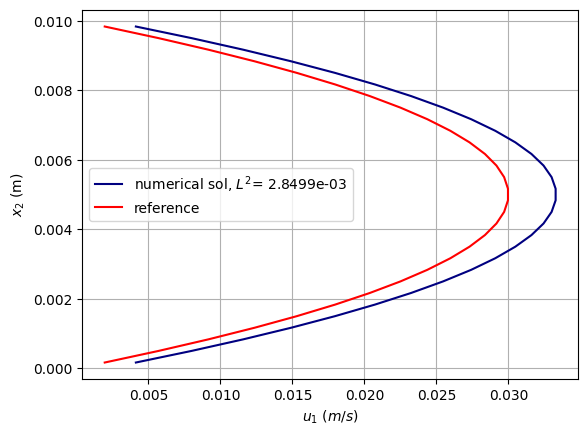

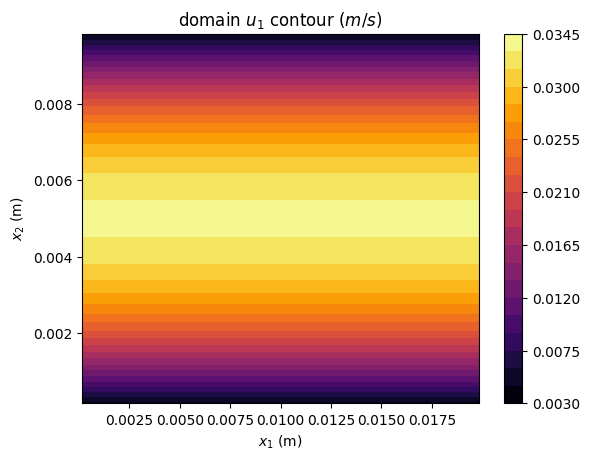

iter= 160000, L_sq= 2.7735e-03


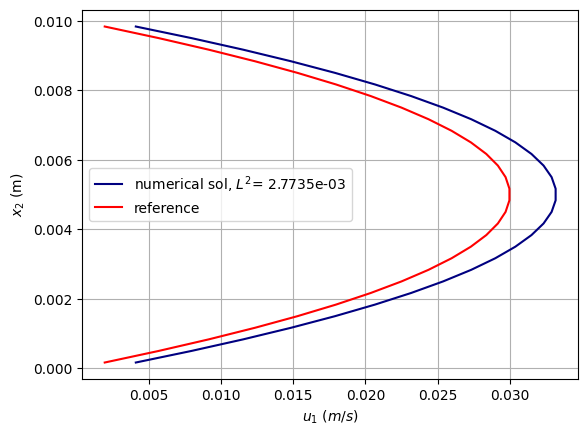

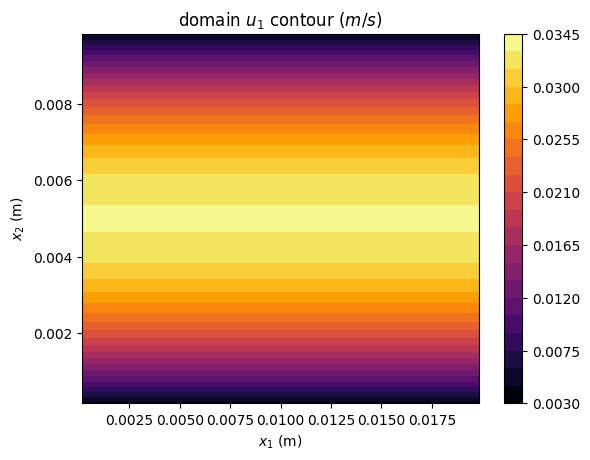

iter= 170000, L_sq= 2.7041e-03


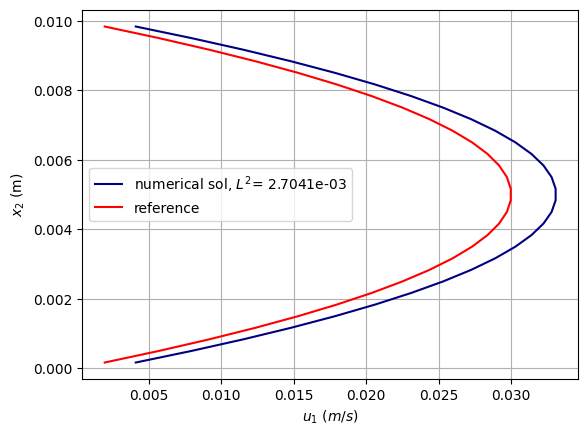

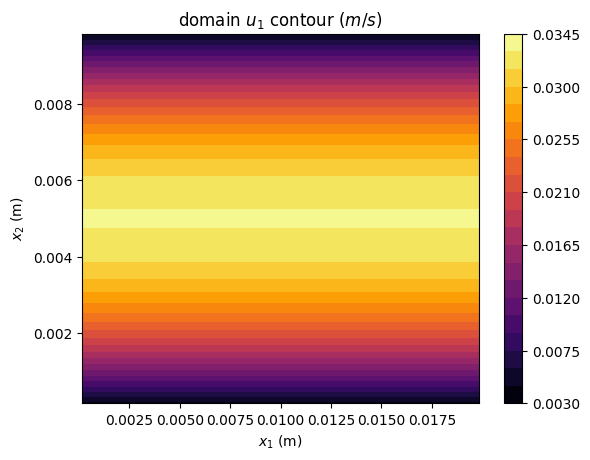

iter= 180000, L_sq= 2.6410e-03


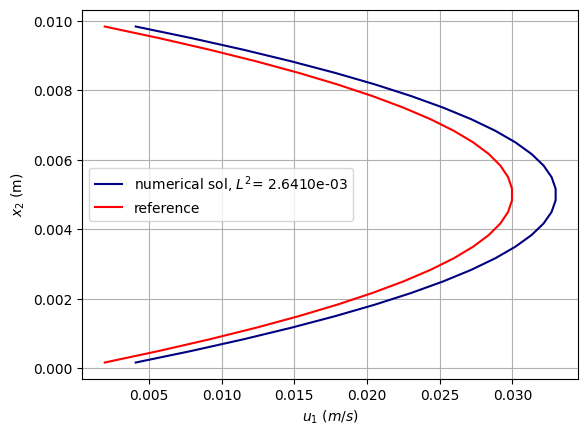

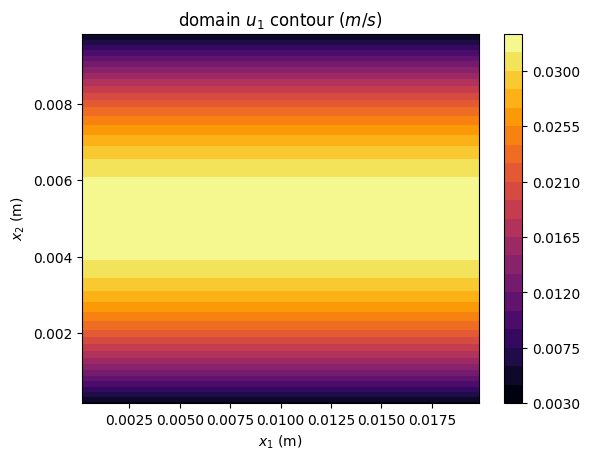

iter= 190000, L_sq= 2.5836e-03


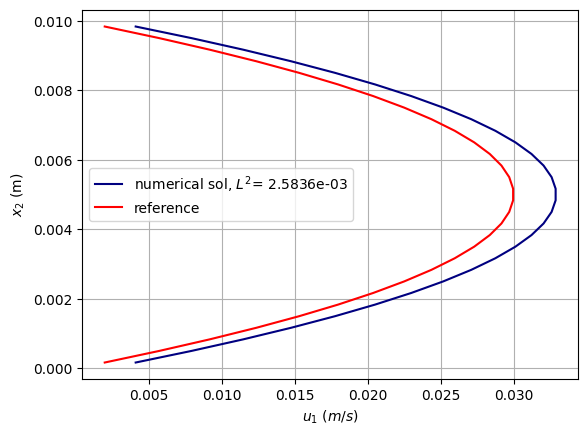

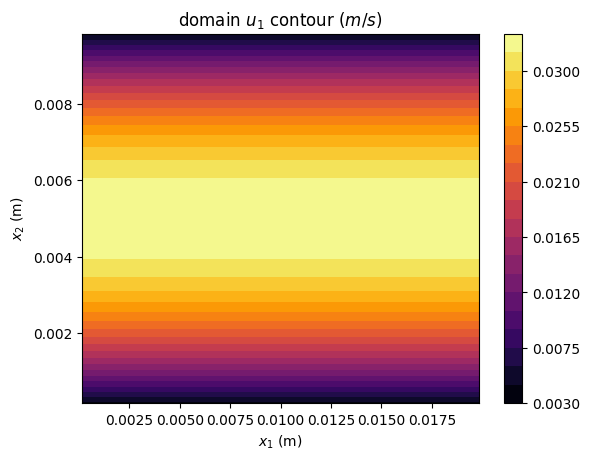

iter= 200000, L_sq= 2.5313e-03


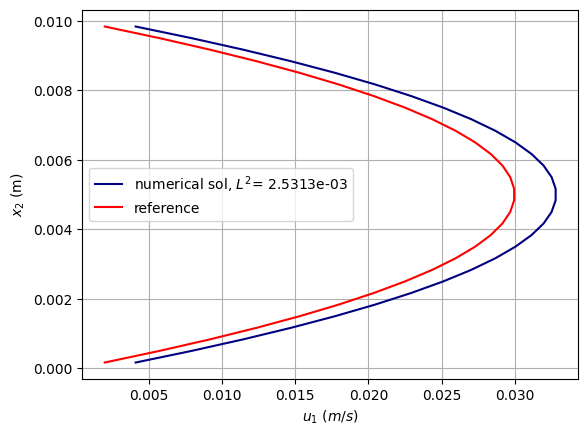

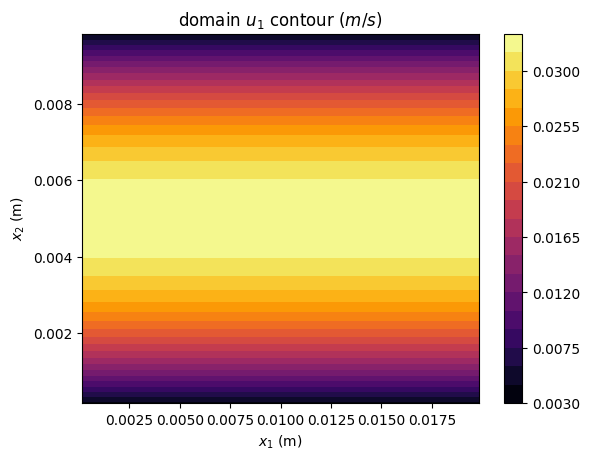

iter= 210000, L_sq= 2.4838e-03


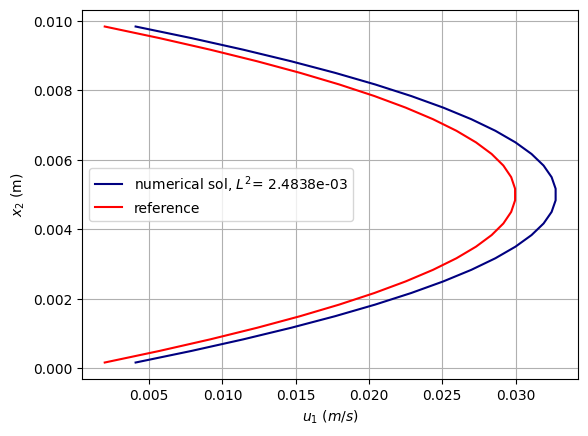

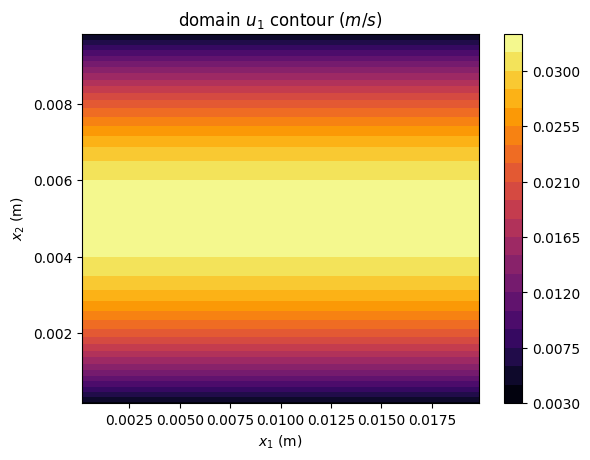

iter= 220000, L_sq= 2.4405e-03


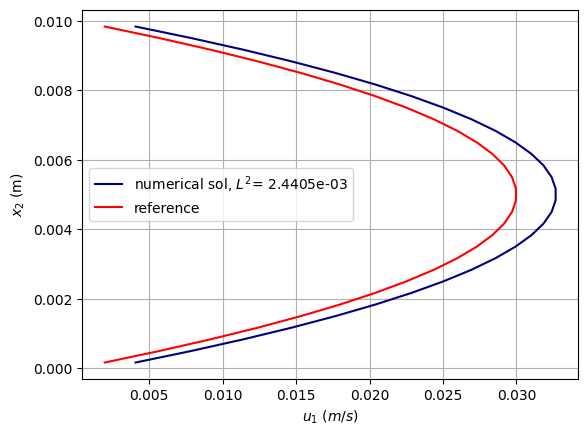

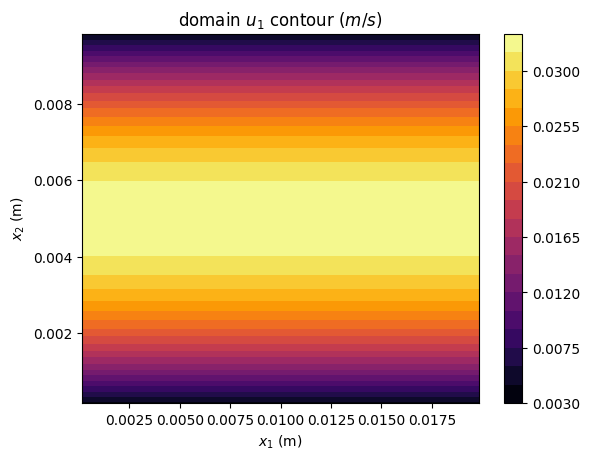

iter= 230000, L_sq= 2.4012e-03


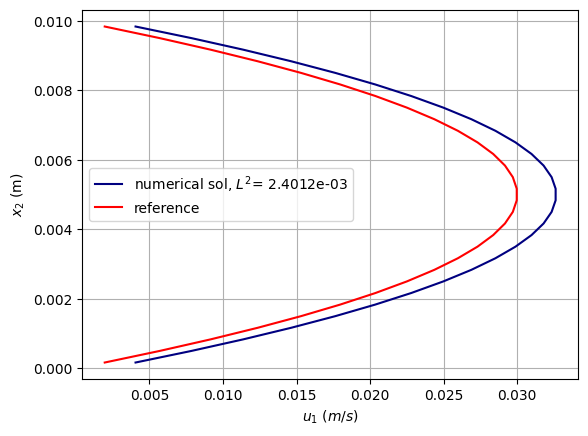

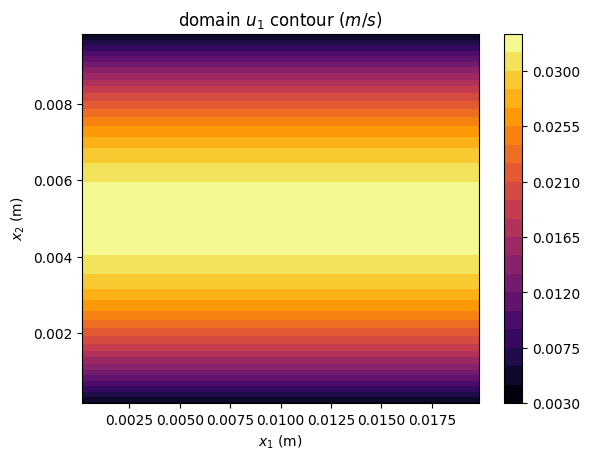

iter= 240000, L_sq= 2.3654e-03


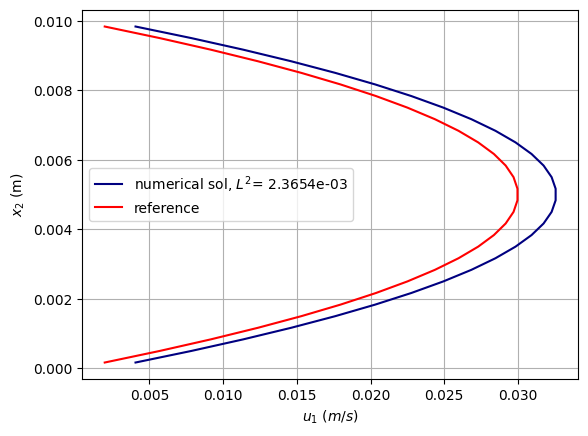

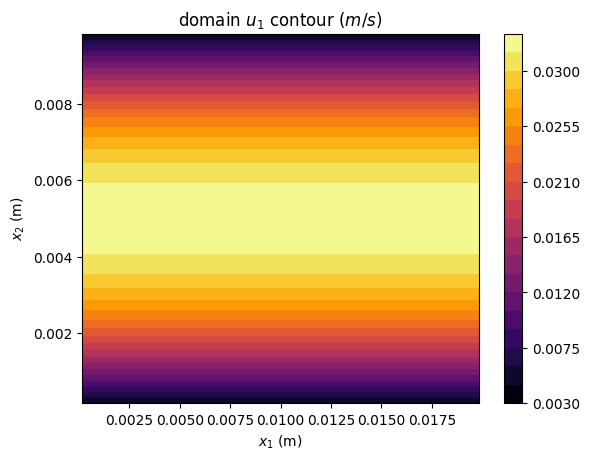

iter= 250000, L_sq= 2.3328e-03


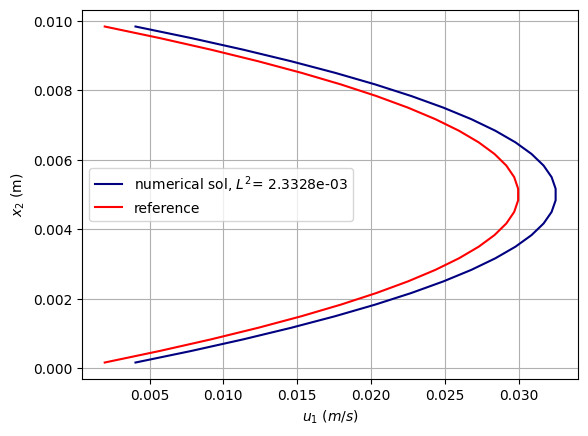

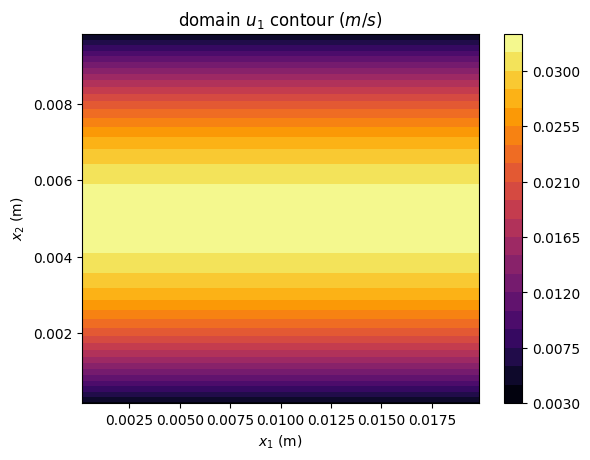

iter= 260000, L_sq= 2.3032e-03


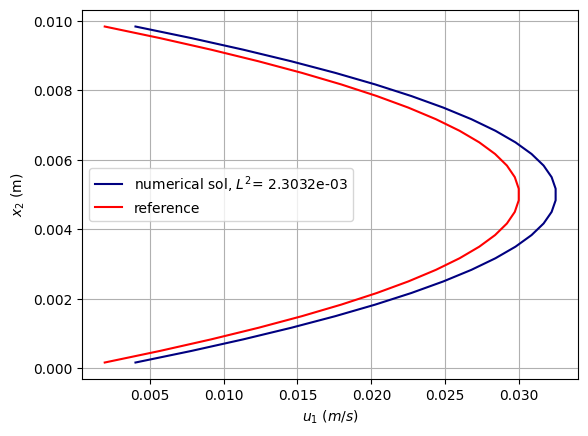

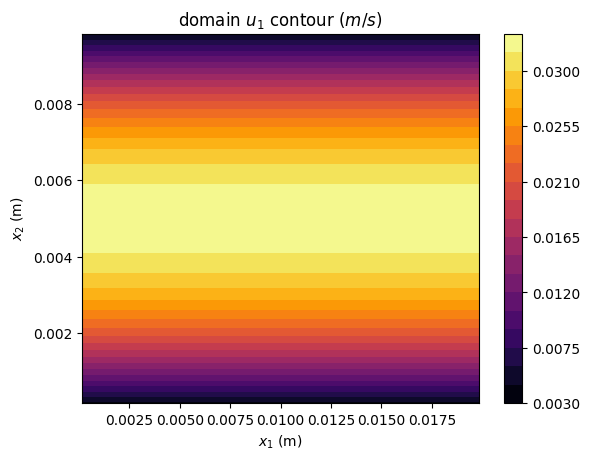

In [ ]:
L_sq_r=L_sq[1]/L_sq[0]
for i in range(1, Nx2+1):
    ref_S_u[i]=ref_vel_prof(cell_S_x_coor_y[0,i])

while L_sq_r<1.01:
    L_sq[0]=L_sq[1]
#predictor step:
    for j in range(1, Nx2+1):
        for i in range(1, Nx1+1):
            cell_S_x_us[i,j]=cell_S_x_un[i,j]+dt*(nu*Dif_x_n(i,j)-Adv_x_n(i,j))
# #B.C. update  
    for j in range(0, Nx2+2):
        cell_S_x_us[0,j]=cell_S_x_us[-2,j]
        cell_S_x_us[-1,j]=cell_S_x_us[1,j]
    for i in range(0, Nx1+2):
        cell_S_x_us[i,0]=-cell_S_y_us[i,1]
        cell_S_x_us[i,-1]=-cell_S_y_us[i,-2]

 #corrector step:
    for j in range(1, Nx2+1):
        for i in range(1, Nx1+1):
            cell_S_x_unn[i,j]=cell_S_x_us[i,j]-(1/rho)*(dt)*(gradP)

 #B.C. update  
    for j in range(0, Nx2+2):
        cell_S_x_unn[0,j]=cell_S_x_unn[-2,j]
        cell_S_x_unn[-1,j]=cell_S_x_unn[1,j]
    for i in range(0, Nx1+2):
        cell_S_x_unn[i,0]=-cell_S_y_unn[i,1]
        cell_S_x_unn[i,-1]=-cell_S_y_unn[i,-2]

    for j in range(1, Nx2+1):
        for i in range(1, Nx1+1):
            cell_S_x_un[i,j]=cell_S_x_unn[i,j]
    for j in range(0, Nx2+2):
        cell_S_x_un[0,j]=cell_S_x_un[-2,j]
        cell_S_x_un[-1,j]=cell_S_x_un[1,j]
    for i in range(0, Nx1+2):
        cell_S_x_un[i,0]=-cell_S_y_un[i,1]
        cell_S_x_un[i,-1]=-cell_S_y_un[i,-2]
    sq_sum_error=0

    for i in range(1,Nx2+1):
        sq_sum_error+=(ref_S_u[i]-cell_S_x_un[50,i])**2
    L_sq[1]=math.sqrt(sq_sum_error/(Nx2+1))

    if n_iter%10000==0:
        print(f'iter= {str(n_iter)}' + ', L_sq= {:.4e}'.format(L_sq[0]))
        plt.plot(cell_S_x_un[50,1:Nx2+1],cell_S_x_coor_y[50,1:Nx2+1], color='navy',
        label='numerical sol, $L^2$= {:10.4e}'.format(L_sq[0]))
        plt.plot(ref_S_u[1:Nx2+1] ,cell_S_x_coor_y[50,1:Nx2+1], color='red',
        label='reference')
        plt.xlabel('$u_1$ ($m/s$)')
        plt.ylabel('$x_2$ (m)')
        plt.legend()

        plt.grid()
        plt.show()

        plt.contourf(cell_cent_x[1:Nx1+1, 1:Nx2+1], cell_cent_y[1:Nx1+1, 1:Nx2+1],
        cell_S_x_un[1:Nx1+1, 1:Nx2+1], 20, cmap='inferno')
        plt.colorbar()
        plt.xlabel('$x_1$ (m)')
        plt.ylabel('$x_2$ (m)')
        plt.title('domain $u_1$ contour ($m/s$)')
        plt.show()
    L_sq_r=L_sq[1]/L_sq[0]

    n_iter+=1


print(f'iter= {n_iter}' + ', L_sq= {:.4e}'.format(L_sq[0]))
plt.plot(cell_S_x_un[50,1:Nx2+1],cell_S_x_coor_y[50,1:Nx2+1], color='navy',
label='numerical sol, $L^2$= {:10.4e}'.format(L_sq[0]))
plt.plot(ref_S_u[1:Nx2+1] ,cell_S_x_coor_y[50,1:Nx2+1], color='red', label='reference')
plt.xlabel('$u_1$ ($m/s$)')
plt.ylabel('$x_2$ (m)')
plt.legend()
plt.grid()
plt.show()

plt.contourf(cell_cent_x[1:Nx1+1, 1:Nx2+1], cell_cent_y[1:Nx1+1, 1:Nx2+1],
cell_S_x_un[1:Nx1+1, 1:Nx2+1], 20, cmap='inferno')
plt.colorbar()
plt.xlabel('$x_1$ (m)')
plt.ylabel('$x_2$ (m)')
plt.title('domain $u_1$ contour ($m/s$)')
plt.show()